# SOMPY 

In [3]:
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
import sompy

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


### A toy example: two dimensional data, four clusters

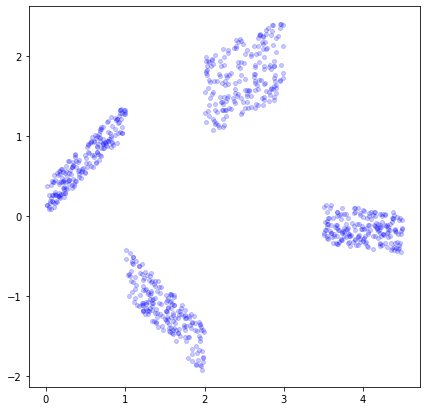

In [4]:
dlen = 200
Data1 = pd.DataFrame(data= 1*np.random.rand(dlen,2))
Data1.values[:,1] = (Data1.values[:,0][:,np.newaxis] + .42*np.random.rand(dlen,1))[:,0]


Data2 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+1)
Data2.values[:,1] = (-1*Data2.values[:,0][:,np.newaxis] + .62*np.random.rand(dlen,1))[:,0]

Data3 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+2)
Data3.values[:,1] = (.5*Data3.values[:,0][:,np.newaxis] + 1*np.random.rand(dlen,1))[:,0]


Data4 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+3.5)
Data4.values[:,1] = (-.1*Data4.values[:,0][:,np.newaxis] + .5*np.random.rand(dlen,1))[:,0]


Data1 = np.concatenate((Data1,Data2,Data3,Data4))

fig = plt.figure()
plt.plot(Data1[:,0],Data1[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)

In [5]:
mapsize = [20,20]
# this will use the default parameters, but i can change the initialization and neighborhood methods
som = sompy.SOMFactory.build(Data1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var',
                             initialization='pca', neighborhood='gaussian', training='batch', name='sompy')
# verbose='debug' will print more, and verbose=None wont print anything
som.train(n_job=1, verbose=None)  

In [6]:
from sompy.visualization.mapview import View2DPacked
atlas = View2DPacked(20, 20, '', text_size=9)
#atlas.show(sm, col_sz=31, which_dim="all")

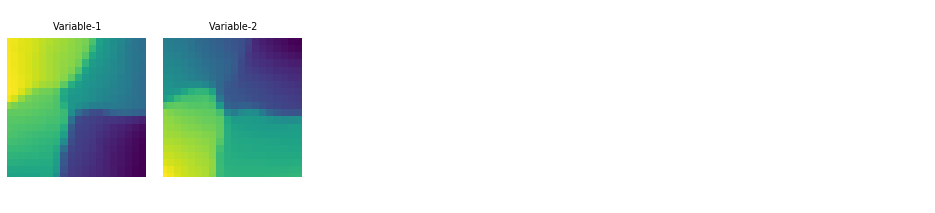

In [7]:
v = sompy.mapview.View2DPacked(50, 50, '',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=plt.cm.viridis_r, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

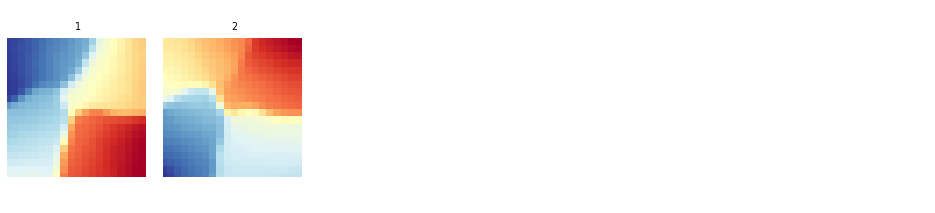

In [8]:
som.component_names = ['1','2']
v = sompy.mapview.View2DPacked(50, 50, '',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap=plt.cm.RdYlBu_r, col_sz=6) #which_dim='all' default

In [9]:
# first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
#print(cl)
print(getattr(som, 'cluster_labels'))

[3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0
 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 0 0 0
 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 0
 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 1 1 1 3
 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]


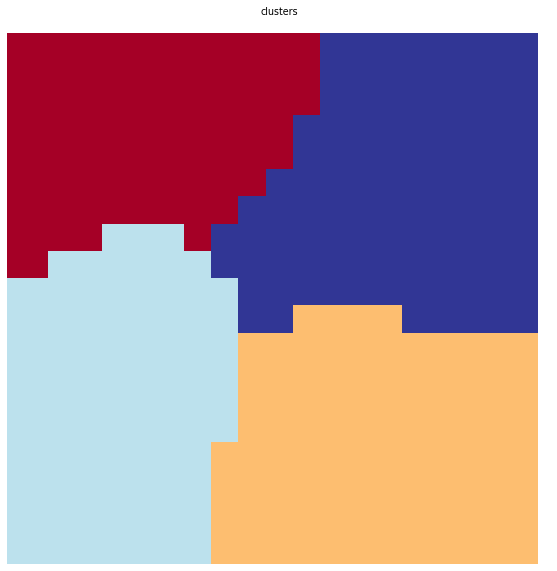

In [11]:
v = sompy.mapview.View2DPacked(2, 2, 'clusters',text_size=8)
v.show(som, what='cluster')

C:\Users\GAO\Jupyter\sompy\visualization\hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


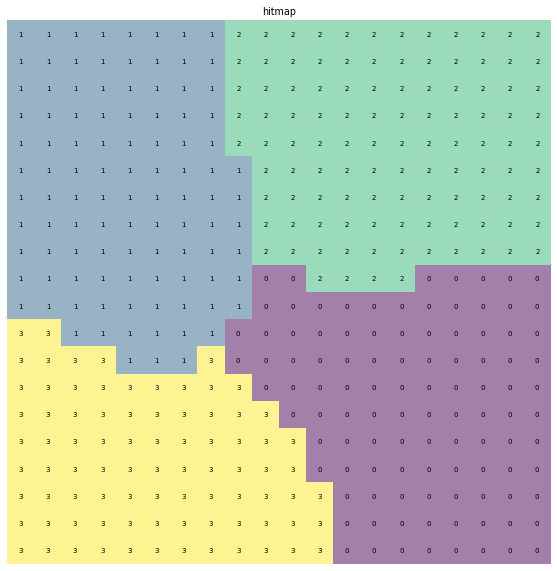

In [12]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

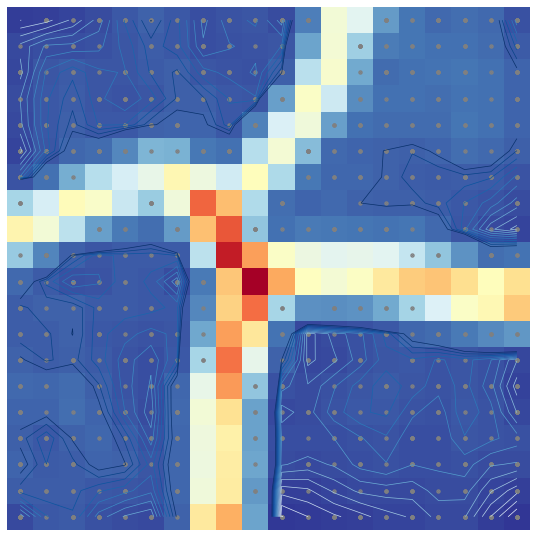

In [10]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

### Some controversy: two dimensional data, circles

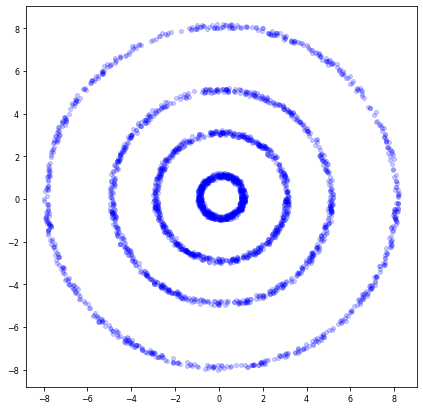

In [11]:
dlen = 700
theta = np.random.uniform(low=0,high=2*np.pi,size=dlen)[:,np.newaxis]
X1 = 3*np.cos(theta)+ .22*np.random.rand(dlen,1)
Y1 = 3*np.sin(theta)+ .22*np.random.rand(dlen,1)
Data1 = np.concatenate((X1,Y1),axis=1)

X2 = 1*np.cos(theta)+ .22*np.random.rand(dlen,1)
Y2 = 1*np.sin(theta)+ .22*np.random.rand(dlen,1)
Data2 = np.concatenate((X2,Y2),axis=1)

X3 = 5*np.cos(theta)+ .22*np.random.rand(dlen,1)
Y3 = 5*np.sin(theta)+ .22*np.random.rand(dlen,1)
Data3 = np.concatenate((X3,Y3),axis=1)

X4 = 8*np.cos(theta)+ .22*np.random.rand(dlen,1)
Y4 = 8*np.sin(theta)+ .22*np.random.rand(dlen,1)
Data4 = np.concatenate((X4,Y4),axis=1)

Data2 = np.concatenate((Data1,Data2,Data3,Data4),axis=0)

fig = plt.figure()
plt.plot(Data2[:,0],Data2[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)
# plt.plot(np.cos(theta))

In [12]:
mapsize = [30,30]
# this will use the default parameters, but i can change the initialization and neighborhood methods
som = sompy.SOMFactory.build(Data2, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var',
                             initialization='pca', neighborhood='gaussian', training='batch', name='sompy')
# verbose='debug' will print more, and verbose=None wont print anything
som.train(n_job=1, verbose=None)

In [39]:
dist = som.calculate_map_dist()

In [41]:
dist.shape

(900, 900)

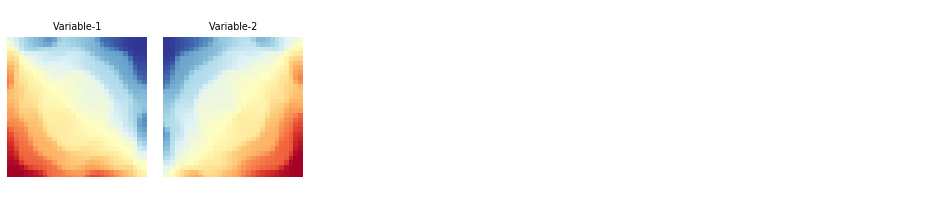

In [13]:
v = sompy.mapview.View2DPacked(50, 50, '',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

In [14]:
# first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
#print(cl)
print(getattr(som, 'cluster_labels'))

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0
 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0
 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 1 1 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 0 0 0 0 0 0 0 0 0 0 0 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0
 0 0 0 0 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 1 1 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 1 1 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 2 0 0 0 0 0 0 0 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 0 0 0 0 0 1
 1 1 1 1 1 1 1 3 3 3 3 3 

C:\Users\GAO\Jupyter\sompy\visualization\mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


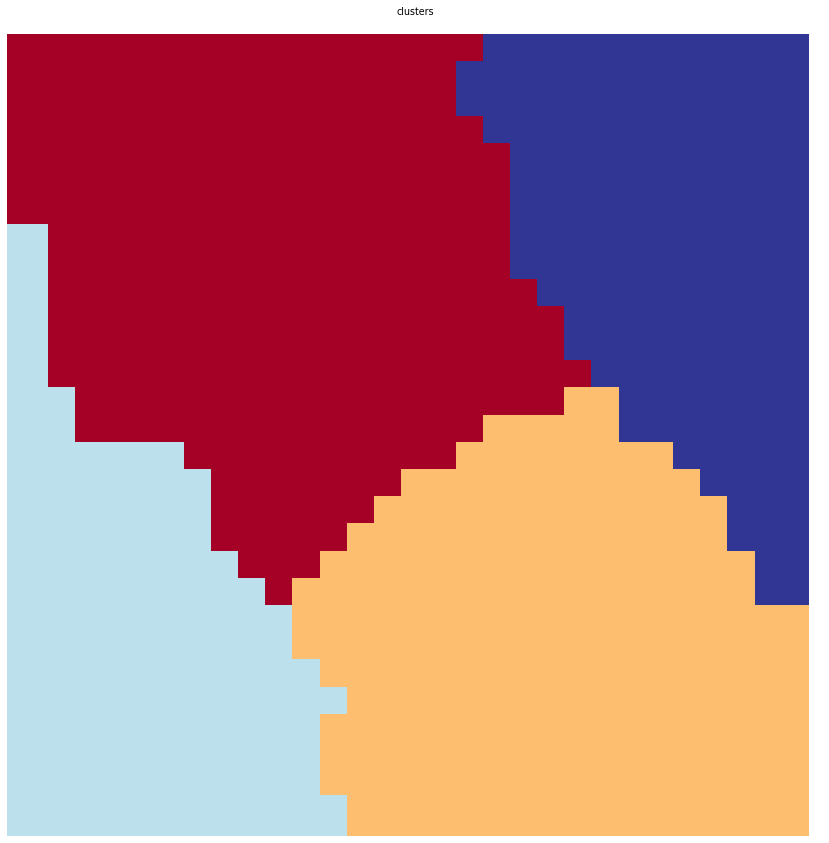

In [17]:
#In this case, K-means simply fails as expected

v = sompy.mapview.View2DPacked(2, 2, 'clusters',text_size=8)
v.show(som, what='cluster')

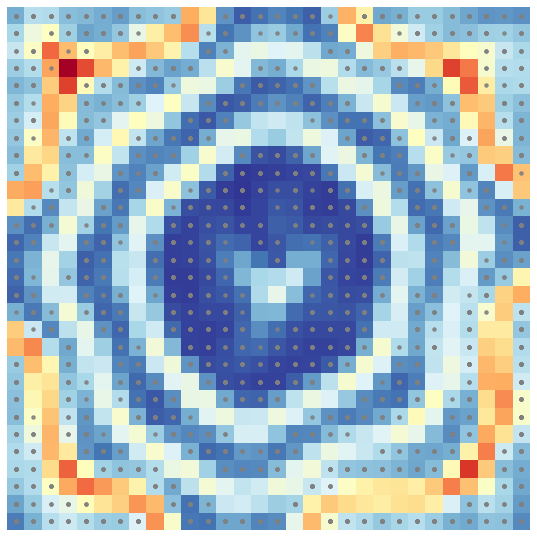

In [16]:
#But Umatrix finds the clusters easily

u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=False, blob=False)